# **Statistical Mechanism for the Network Intrusion Detection System (NIDS)**


![](https://aihubprojects.com/wp-content/uploads/2019/09/1_dSn6e4V_cP-5Nm9LhACpLw.png)

### **IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf

In [9]:
from keras.layers import Input,Dropout,Dense

In [10]:
from keras.models import Model

In [11]:
from keras import regularizers

In [12]:
from sklearn import metrics

In [13]:
from sklearn.svm import SVC 

In [14]:
from sklearn.naive_bayes import BernoulliNB 

In [15]:
from sklearn import tree

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.feature_selection import RFE

In [20]:
import itertools

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.preprocessing import OneHotEncoder 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

In [27]:
nrows=20000

### IMPORTING DATASETS

In [28]:
df1 = pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", nrows=nrows)

In [29]:
df2=pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", nrows=nrows)

In [30]:
df3=pd.read_csv("Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv", nrows=nrows)

In [31]:
df4=pd.read_csv("Dataset/Monday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [32]:
df5=pd.read_csv("Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", nrows=nrows)

In [33]:
df6=pd.read_csv("Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", nrows=nrows)

In [34]:
df7=pd.read_csv("Dataset/Tuesday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [35]:
df8=pd.read_csv("Dataset/Wednesday-workingHours.pcap_ISCX.csv", nrows=nrows)

In [36]:
df = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8])

### DATA PREPROCESSING

In [37]:
del df1,df2, df3, df4,df5,df6,df7,df8

In [38]:
nRow, nCol = df.shape
print(f'Rows {nRow} Columns {nCol} ')

Rows 160000 Columns 85 


In [39]:
df = df.dropna()

In [40]:
df.columns = df.columns.str.strip()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19997 entries, 0 to 19999
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             19997 non-null  int64  
 1   Flow Duration                19997 non-null  int64  
 2   Total Fwd Packets            19997 non-null  int64  
 3   Total Backward Packets       19997 non-null  int64  
 4   Total Length of Fwd Packets  19997 non-null  int64  
 5   Total Length of Bwd Packets  19997 non-null  int64  
 6   Fwd Packet Length Max        19997 non-null  int64  
 7   Fwd Packet Length Min        19997 non-null  int64  
 8   Fwd Packet Length Mean       19997 non-null  float64
 9   Fwd Packet Length Std        19997 non-null  float64
 10  Bwd Packet Length Max        19997 non-null  int64  
 11  Bwd Packet Length Min        19997 non-null  int64  
 12  Bwd Packet Length Mean       19997 non-null  float64
 13  Bwd Packet Length Std

In [42]:
df = df[["Destination Port", "Flow Duration", "Total Fwd Packets", 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets', 'Subflow Bwd Bytes','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward',"Label"]]

In [43]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,22,1266342,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
1,22,1319353,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
2,22,160,1,1,0,0,1,0,1,0,243,0,32,BENIGN
3,22,1303488,41,42,2728,6634,41,2728,42,6634,243,24,32,BENIGN
4,35396,77,1,2,0,0,1,0,2,0,290,0,32,BENIGN


### GENERATING PLOT FOR EACH COLUMN

In [44]:
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Use math.ceil to round up
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
                columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


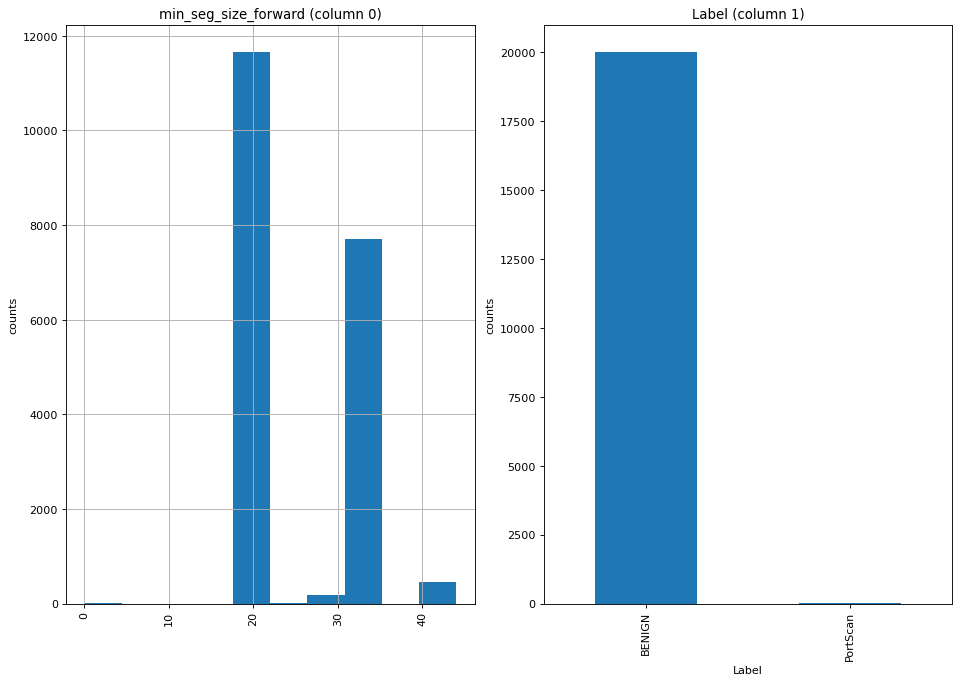

In [45]:
plotPerColumnDistribution(df, 79, 5)

In [46]:
train,test =train_test_split(df,test_size=0.3, random_state=10)

In [47]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000,1.399700e+04,13997.000000,13997.000000,13997.000000
mean,7003.191541,1.250648e+07,7.064585,7.129528,576.093663,6.776411e+03,7.064585,576.093663,7.129528,6.776411e+03,2745.284775,4.335572,25.165964
std,17090.865097,3.199504e+07,33.380260,49.085339,3927.163084,9.063997e+04,33.380260,3927.163084,49.085339,9.063997e+04,10300.860335,25.277970,6.298175
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,53.000000,1.830000e+02,2.000000,1.000000,37.000000,6.000000e+00,2.000000,37.000000,1.000000,6.000000e+00,-1.000000,0.000000,20.000000
50%,80.000000,3.680800e+04,2.000000,2.000000,70.000000,1.440000e+02,2.000000,70.000000,2.000000,1.440000e+02,-1.000000,1.000000,20.000000
75%,443.000000,1.030024e+06,4.000000,3.000000,180.000000,3.860000e+02,4.000000,180.000000,3.000000,3.860000e+02,252.000000,3.000000,32.000000
max,64253.000000,1.199989e+08,1301.000000,2327.000000,202391.000000,4.877474e+06,1301.000000,202391.000000,2327.000000,4.877474e+06,65535.000000,1134.000000,44.000000


In [48]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000
mean,6912.188500,1.194322e+07,7.144167,7.522000,598.150333,7.531619e+03,7.144167,598.150333,7.522000,7.531619e+03,2634.510167,4.558000,25.067333
std,16993.709391,3.151548e+07,40.898812,61.763295,4379.581840,1.098126e+05,40.898812,4379.581840,61.763295,1.098126e+05,10074.539708,35.224789,6.291216
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,53.000000,1.820000e+02,2.000000,1.000000,37.000000,6.000000e+00,2.000000,37.000000,1.000000,6.000000e+00,-1.000000,0.000000,20.000000
50%,80.000000,3.122250e+04,2.000000,2.000000,68.000000,1.400000e+02,2.000000,68.000000,2.000000,1.400000e+02,-1.000000,1.000000,20.000000
75%,443.000000,4.530348e+05,4.000000,2.000000,156.000000,3.480000e+02,4.000000,156.000000,2.000000,3.480000e+02,243.000000,3.000000,32.000000
max,62465.000000,1.199981e+08,1799.000000,2792.000000,232349.000000,5.074075e+06,1799.000000,232349.000000,2792.000000,5.074075e+06,65535.000000,1798.000000,44.000000


In [49]:
train['Label'].value_counts()
test['Label'].value_counts()

Label
BENIGN    6000
Name: count, dtype: int64

In [50]:
# standard data to features 
scaler = StandardScaler()

In [51]:
cols = train.select_dtypes(include=['float64','int64']).columns
# scale the training data
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
# scaling the testing data
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [52]:
# converts the standardized NumPy arrays (sc_train and sc_test) back into Pandas DataFrames
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [53]:
# convert categorical features into a format and improve the performance
onehotencoder = OneHotEncoder() 

In [54]:
trainDep = train['Label'].values.reshape(-1,1)
# One-Hot Encode the Training Data Labels
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
# One-Hot Encode the Test Data Labels
testDep = onehotencoder.fit_transform(testDep).toarray()

In [55]:
# Assign Standardized Training Data to train_X
train_X=sc_traindf
train_y=trainDep[:,0]

In [56]:
test_X=sc_testdf
test_y=testDep[:,0]

In [57]:
# many to one output prediction
rfc = RandomForestClassifier()

In [58]:
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [59]:
# Get Feature Importances and Round Them
score = np.round(rfc.feature_importances_,3)

# Create a DataFrame for Feature Importances
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})

# Sort and Set Index
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<Axes: xlabel='feature'>

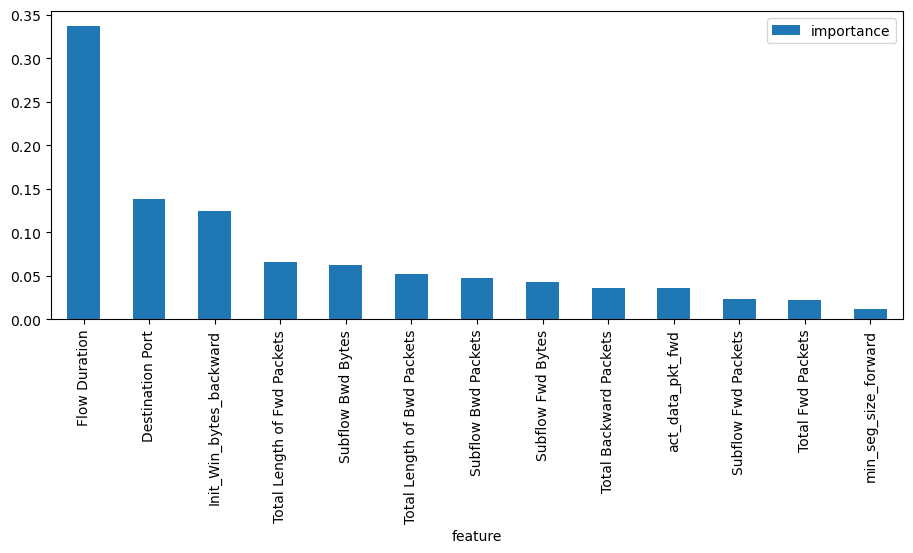

In [60]:
plt.rcParams['figure.figsize'] = (11, 4)
# Plot Feature Importances as a Bar Chart
importances.plot.bar()

In [61]:
rfc = RandomForestClassifier()

In [62]:
#  Recursive Feature Elimination (RFE)
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

In [63]:
# Create a Feature Map for iteration
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]

In [64]:
 selected_features = [v for i, v in feature_map if i==True] # extract the selected feature 

In [65]:
selected_features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward']

In [66]:
a = [i[0] for i in feature_map]

# Filtering the training and testing
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [68]:
# KNN CLASSIFIER
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [69]:
# LOGISTIC REGRESTION CLASSIFIER
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [70]:
# Bernoulli Naive Bayes Classifier
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [71]:
# Decision Tree Classifier
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### MODEL SELECTION

In [72]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

In [73]:
# Use StratifiedKFold to ensure balanced folds
skf = StratifiedKFold(n_splits=5)

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=skf)
    v.fit(X_train, Y_train)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train), zero_division=1)
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994896396537175

Model Accuracy:
 0.999489639685618

Confusion matrix:
 [[   0    5]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.00      0.00         5
         1.0       1.00      1.00      1.00      9792

    accuracy                           1.00      9797
   macro avg       1.00      0.50      0.50      9797
weighted avg       1.00      1.00      1.00      9797



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9995917325582606

Model Accuracy:
 1.0

Confusion matrix:
 [[   5    0]
 [   0 9792]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00      9792


In [74]:
for i, v in models:
    # Make predictions on the test data
    y_pred = v.predict(X_test)
    
    # Calculate metrics
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
    classification = metrics.classification_report(Y_test, y_pred, zero_division=1)
    
    # Display results
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9995238095238095

Confusion matrix:
 [[   0    2]
 [   0 4198]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.00      0.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       1.00      0.50      0.50      4200
weighted avg       1.00      1.00      1.00      4200



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 1.0

Confusion matrix:
 [[   2    0]
 [   0 4198]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00      4198

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1

### MODEL BUILDING

In [75]:
def getModel():
    inp = Input(shape=(X_train.shape[1],))
    d1=Dropout(0.3)(inp)
#  encode the input features into a lower-dimensional representation.
    encoded = Dense(8, activation='relu', activity_regularizer=regularizers.l1(10e-5))(d1)
# reconstructs the input data from its encoded representation.
    decoded = Dense(X_train.shape[1], activation='relu')(encoded)
    
# Combines the input layer and the decoded output to create the autoencoder model.
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return autoencoder

In [76]:
autoencoder=getModel()

In [77]:
# The purpose of this callback is to stop the training process early if the model's performance stops improving, 
# which can help prevent overfitting and reduce training time.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

### MODEL TRAINING

In [79]:
# epochs

history=autoencoder.fit(X_train, Y_train,
               epochs= 32,
                batch_size=150,
                shuffle=True,
                validation_split=0.1, callbacks=[callback]
                       )

Epoch 1/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0664 - val_accuracy: 0.9878 - val_loss: 0.0520
Epoch 2/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0595 - val_accuracy: 0.9878 - val_loss: 0.0517
Epoch 3/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0580 - val_accuracy: 0.9878 - val_loss: 0.0515
Epoch 4/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0588 - val_accuracy: 0.9878 - val_loss: 0.0512
Epoch 5/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0644 - val_accuracy: 0.9939 - val_loss: 0.0353
Epoch 6/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9888 - loss: 0.0564 - val_accuracy: 0.9939 - val_loss: 0.0350
Epoch 7/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0523 - val_accuracy: 0.9939 - val_loss: 0.0348
Epoch 8/32
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0535 - val_accuracy: 0.9939 - val_loss:

### ACCURACY OF THE MODELS

In [83]:
for name, model in models:
    Y_pred = model.predict(X_test)  # Predict the labels for the test set
    accuracy = accuracy_score(Y_test, Y_pred)  # Calculate accuracy
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)


Model: Naive Baye Classifier
Accuracy: 0.9995
------------------------------
Model: Decision Tree Classifier
Accuracy: 1.0000
------------------------------
Model: KNeighborsClassifier
Accuracy: 0.9993
------------------------------
Model: LogisticRegression
Accuracy: 0.9995
------------------------------


## VISUALIZATION OF RESULTS

Text(0.5, 0, 'epoch')

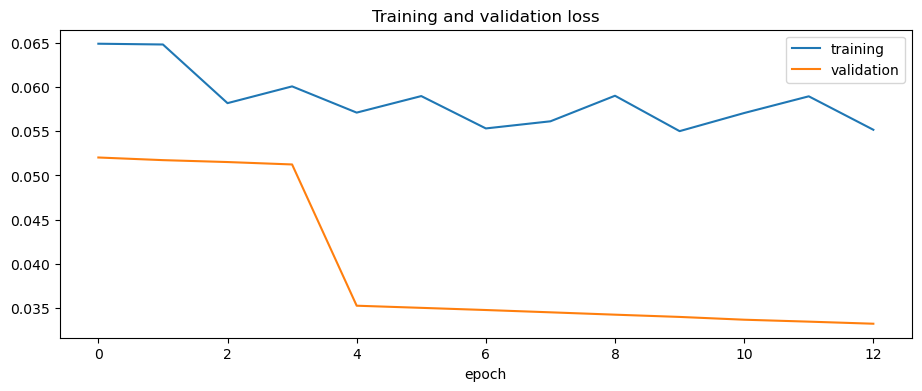

In [84]:
# Training and validation loss  

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

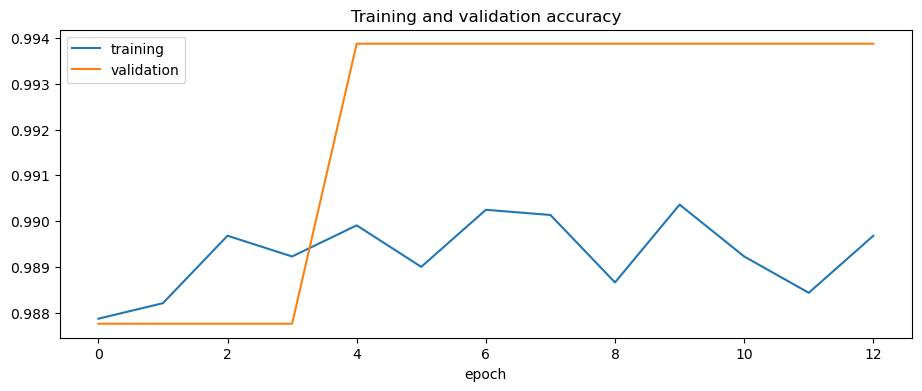

In [85]:
# Training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')